IndexError: list index out of range

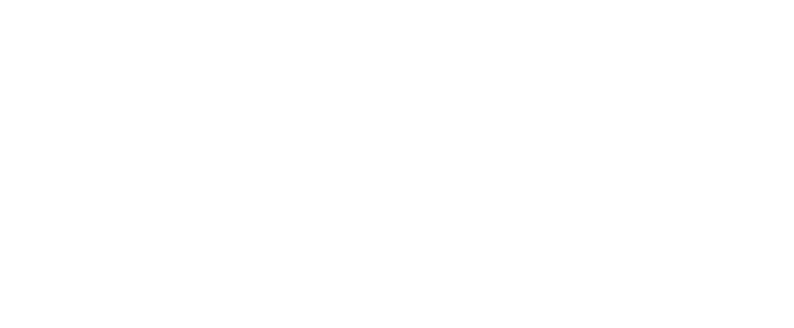

In [ ]:
# Import necessary libraries
import matplotlib.pyplot as plt
import pandas as pd
import json
from IPython.display import display

# File paths
baseline = "../../models/Baseline/test_results.json"
hybrid_concat = "../../models/Hybrid_Concat/Hybrid_Concat_Freeze/test_results.json"
hybrid_dense = "../../models/Hybrid_Dense_Layer/Hybrid_Dense_Layer_Freeze/test_results.json"
hybrid_cross = "../../models/Hybrid_Cross_Attention/Hybrid_Cross_Attention_Freeze/test_results.json"

# Read from actual files
with open(baseline, 'r') as f:
    baseline_results = json.load(f)
with open(hybrid_concat, 'r') as f:
    hybrid_concat_results = json.load(f)
with open(hybrid_dense, 'r') as f:
    hybrid_dense_results = json.load(f)
with open(hybrid_cross, 'r') as f:
    hybrid_cross_results = json.load(f)

# Combine all results into a dictionary
all_results = {
    'Baseline': baseline_results,
    'Hybrid Concat': hybrid_concat_results,
    'Hybrid Dense': hybrid_dense_results,
    'Hybrid Cross': hybrid_cross_results
}

# Prepare data for table and plotting
models = list(all_results.keys())
metrics = ['loss', 'intent_f1', 'category_f1', 'ner_f1']
table_data = [[model] + [f"{all_results[model][metric]:.4f}" for metric in metrics] for model in models]
column_labels = ['Model', 'Loss', 'Intent F1', 'Category F1', 'NER F1']

# Create styled table with highlighting
plt.figure(figsize=(10, 4))
ax = plt.gca()
ax.axis('off')
table = plt.table(cellText=table_data,
                  colLabels=column_labels,
                  cellLoc='center',
                  loc='center',
                  bbox=[0, 0, 1, 1])
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.5)

# Highlight the highest/lowest value in each metric column (excluding 'Model')
for col in range(3, len(column_labels)):  # Start from 1 to skip 'Model'
    values = [float(table_data[row][col]) for row in range(len(table_data))]
    # For Loss (col=1), highlight the lowest value; for others, highlight the highest
    target_val = min(values) if col == 1 else max(values)
    for row in range(len(table_data)):
        if float(table_data[row][col]) == target_val:
            table[(row, col)].set_facecolor('#ADD8E6')  # Light blue for highlight

plt.title('Combined Test Results', pad=20)
plt.show()

# Prepare data for plotting with percentage conversion for F1 scores
losses = [all_results[model]['loss'] for model in models]
intent_f1s = [all_results[model]['intent_f1'] * 100 for model in models]  # Convert to percentage
category_f1s = [all_results[model]['category_f1'] * 100 for model in models]
ner_f1s = [all_results[model]['ner_f1'] * 100 for model in models]

# Function to add labels inside bars near the end
def add_labels(bars, values):
    for bar, value in zip(bars, values):
        width = bar.get_width()
        # Place label inside the bar, near the right end (90% of the bar width)
        x_pos = width * 0.9
        label = f'{value:.3f}%' if value != losses[bars.index(bar)] else f'{value:.3f}'  # 3 decimals, % for F1
        plt.text(x_pos, bar.get_y() + bar.get_height()/2, label,
                 ha='center', va='center', color='black', fontsize=10)  # Dark gray for readability


# Plot 2: Intent F1
plt.figure(figsize=(10, 6))
plt.gca().set_facecolor('#f5f5f5')  # Light background
bars = plt.barh(models, intent_f1s, color='#ffcc99', height=0.5)
max_intent_idx = intent_f1s.index(max(intent_f1s))
bars[max_intent_idx].set_color('#1E90FF')  # Light blue for highest F1
plt.title('Intent F1 Score Comparison', pad=10, fontsize=14)
plt.xlabel('F1 Score (%)', labelpad=10)
plt.grid(True, axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
add_labels(bars, intent_f1s)
plt.show()

# Plot 3: Category F1
plt.figure(figsize=(10, 6))
plt.gca().set_facecolor('#f5f5f5')  # Light background
bars = plt.barh(models, category_f1s, color='#ffcc99', height=0.5)
max_category_idx = category_f1s.index(max(category_f1s))
bars[max_category_idx].set_color('#1E90FF')  # Light blue for highest F1
plt.title('Category F1 Score Comparison', pad=10, fontsize=14)
plt.xlabel('F1 Score (%)', labelpad=10)
plt.grid(True, axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
add_labels(bars, category_f1s)
plt.show()

# Plot 4: NER F1
plt.figure(figsize=(10, 6))
plt.gca().set_facecolor('#f5f5f5')  # Light background
bars = plt.barh(models, ner_f1s, color='#ffcc99', height=0.5)
max_ner_idx = ner_f1s.index(max(ner_f1s))
bars[max_ner_idx].set_color('#1E90FF')  # Light blue for highest F1
plt.title('NER F1 Score Comparison', pad=10, fontsize=14)
plt.xlabel('F1 Score (%)', labelpad=10)
plt.grid(True, axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
add_labels(bars, ner_f1s)
plt.show()

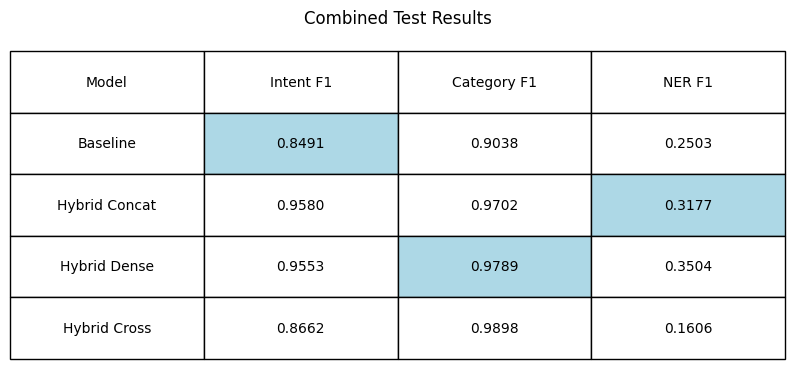

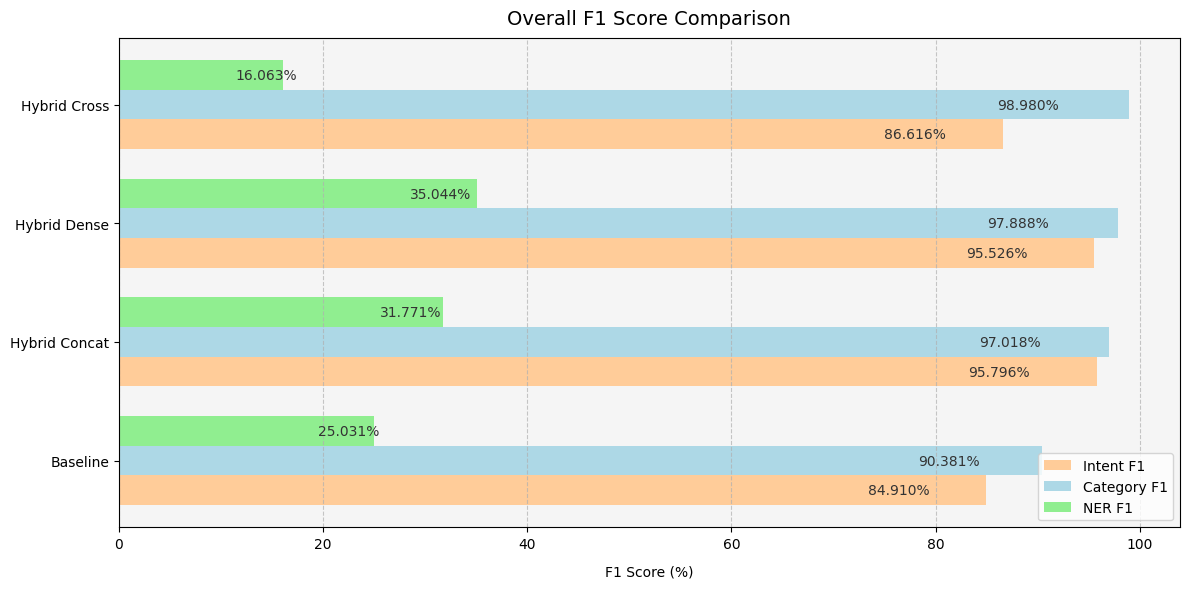

In [18]:
# Import necessary libraries
import matplotlib.pyplot as plt
import pandas as pd
import json
from IPython.display import display

# File paths
baseline = "../../models/Baseline/test_results.json"
hybrid_concat = "../../models/Hybrid_Concat/Hybrid_Concat_Freeze/test_results.json"
hybrid_dense = "../../models/Hybrid_Dense_Layer/Hybrid_Dense_Layer_Freeze/test_results.json"
hybrid_cross = "../../models/Hybrid_Cross_Attention/Hybrid_Cross_Attention_Freeze/test_results.json"

# Read from actual files
with open(baseline, 'r') as f:
    baseline_results = json.load(f)
with open(hybrid_concat, 'r') as f:
    hybrid_concat_results = json.load(f)
with open(hybrid_dense, 'r') as f:
    hybrid_dense_results = json.load(f)
with open(hybrid_cross, 'r') as f:
    hybrid_cross_results = json.load(f)

# Combine all results into a dictionary
all_results = {
    'Baseline': baseline_results,
    'Hybrid Concat': hybrid_concat_results,
    'Hybrid Dense': hybrid_dense_results,
    'Hybrid Cross': hybrid_cross_results
}

# Prepare data for table and plotting
models = list(all_results.keys())
metrics = ['intent_f1', 'category_f1', 'ner_f1']  # Removed 'loss'
table_data = [[model] + [f"{all_results[model][metric]:.4f}" for metric in metrics] for model in models]
column_labels = ['Model', 'Intent F1', 'Category F1', 'NER F1']

# Create styled table with highlighting
plt.figure(figsize=(10, 4))
ax = plt.gca()
ax.axis('off')
table = plt.table(cellText=table_data,
                  colLabels=column_labels,
                  cellLoc='center',
                  loc='center',
                  bbox=[0, 0, 1, 1])
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.5)

# Highlight the highest value in each metric column (excluding 'Model')
for col in range(1, len(column_labels)):  # Start from 1 to skip 'Model'
    max_val = max(float(table_data[row][col]) for row in range(len(table_data)))
    for row in range(len(table_data)):
        if float(table_data[row][col]) == max_val:
            table[(row, col)].set_facecolor('#ADD8E6')  # Light blue for highlight

plt.title('Combined Test Results', pad=20)
plt.show()

# Prepare data for plotting with percentage conversion
intent_f1s = [all_results[model]['intent_f1'] * 100 for model in models]  # Convert to percentage
category_f1s = [all_results[model]['category_f1'] * 100 for model in models]
ner_f1s = [all_results[model]['ner_f1'] * 100 for model in models]

# Function to add labels inside bars near the end
def add_labels(bars, values, offset=0.9):
    for bar, value in zip(bars, values):
        width = bar.get_width()
        # Place label inside the bar, near the right end (90% of the bar width)
        x_pos = width * offset
        label = f'{value:.3f}%'
        plt.text(x_pos, bar.get_y() + bar.get_height()/2, label,
                 ha='center', va='center', color='#333333', fontsize=10)  # Dark gray for readability

# Single bar graph for all metrics
bar_width = 0.25
index = range(len(models))

plt.figure(figsize=(12, 6))
plt.gca().set_facecolor('#f5f5f5')  # Light background

# Plot bars for each metric with different colors
plt.barh([i - bar_width for i in index], intent_f1s, bar_width, label='Intent F1', color='#ffcc99')  # Light orange
plt.barh(index, category_f1s, bar_width, label='Category F1', color='#ADD8E6')  # Light blue
plt.barh([i + bar_width for i in index], ner_f1s, bar_width, label='NER F1', color='#90ee90')  # Light green

# Add labels inside bars near the end
add_labels(plt.barh([i - bar_width for i in index], intent_f1s, bar_width, color='#ffcc99'), intent_f1s)
add_labels(plt.barh(index, category_f1s, bar_width, color='#ADD8E6'), category_f1s)
add_labels(plt.barh([i + bar_width for i in index], ner_f1s, bar_width, color='#90ee90'), ner_f1s)

# Customize the plot
plt.xlabel('F1 Score (%)', labelpad=10)
plt.title('Overall F1 Score Comparison', pad=10, fontsize=14)
plt.yticks(index, models)
plt.legend()
plt.grid(True, axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

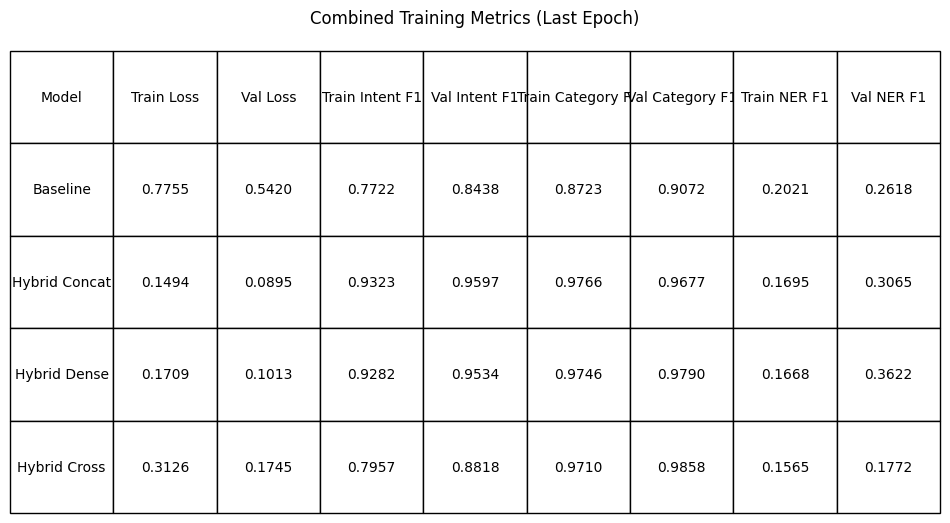

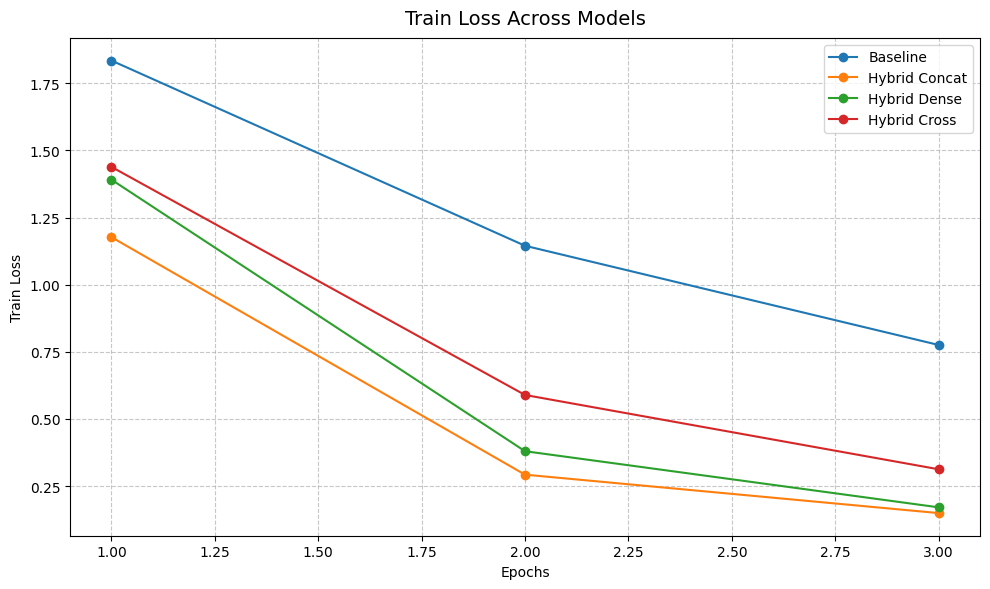

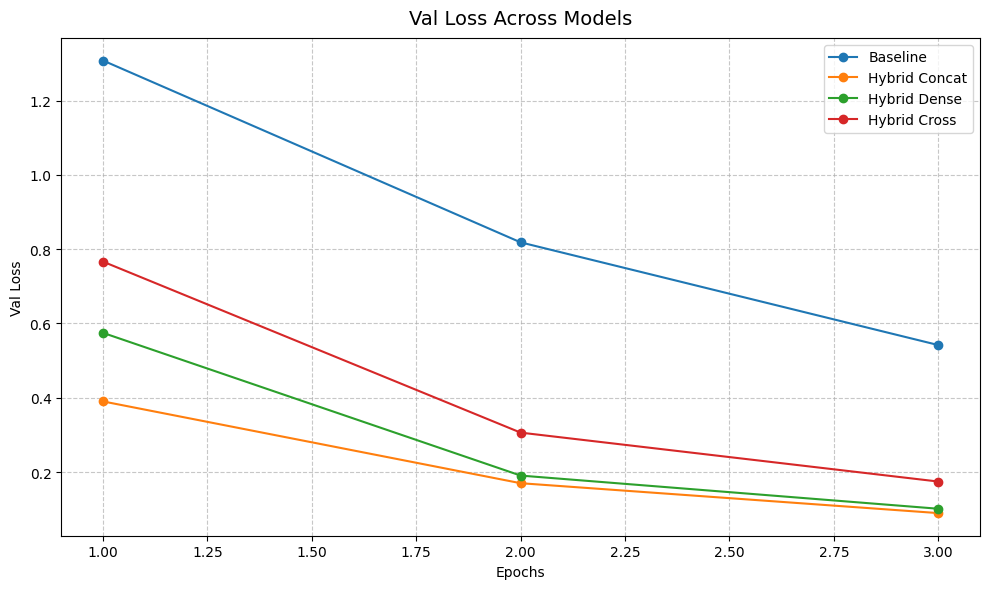

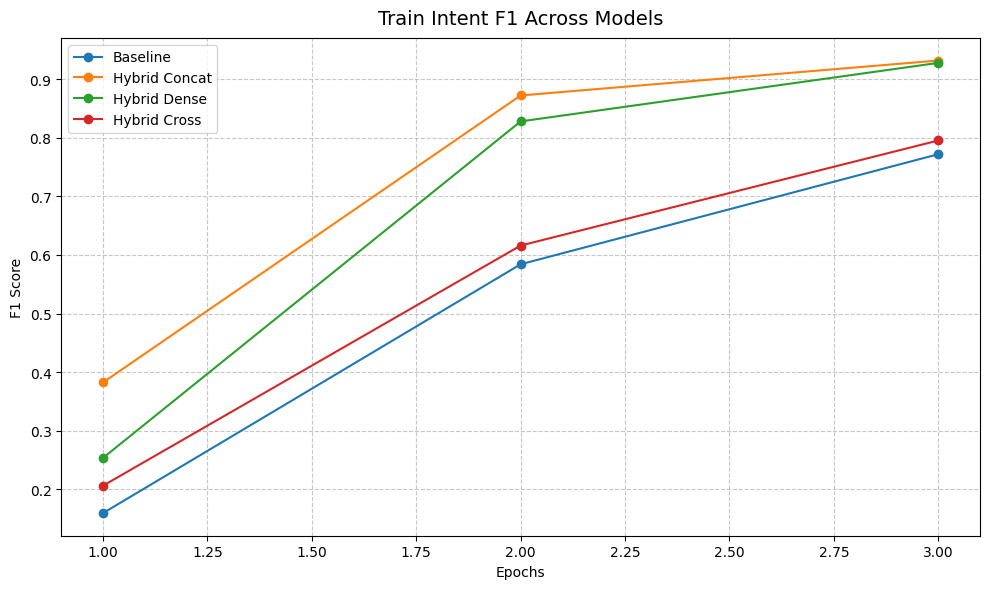

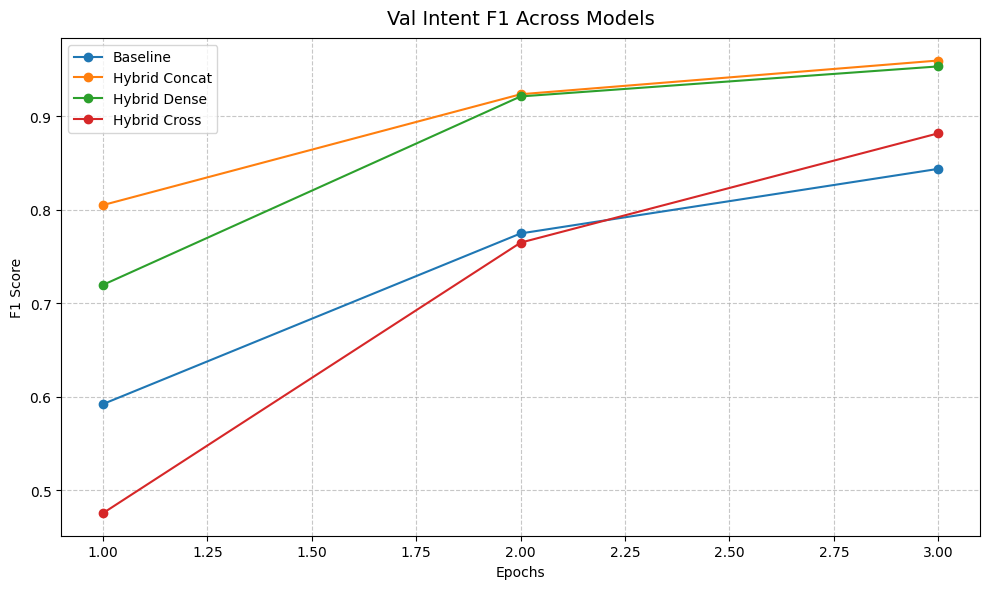

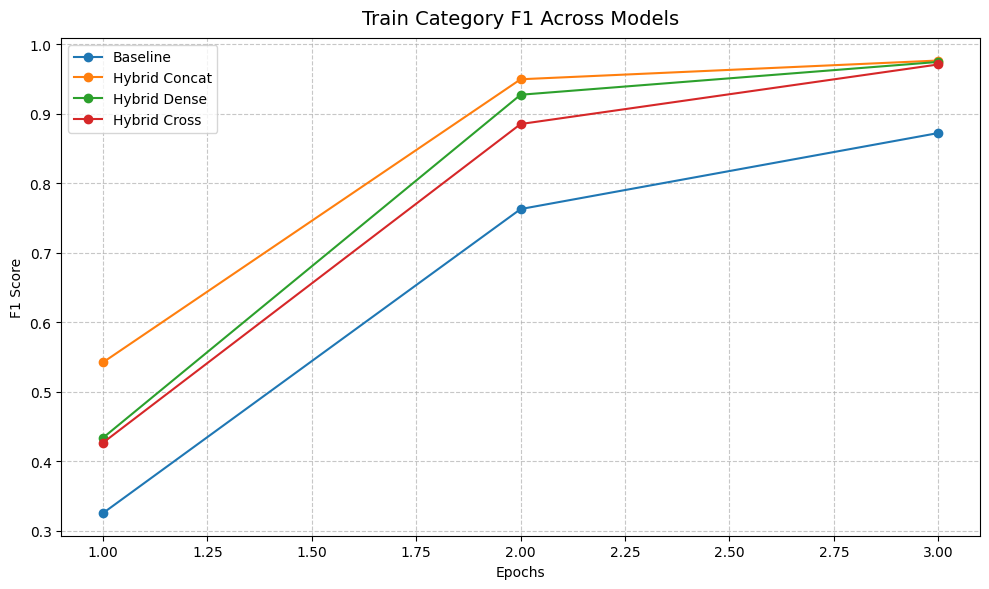

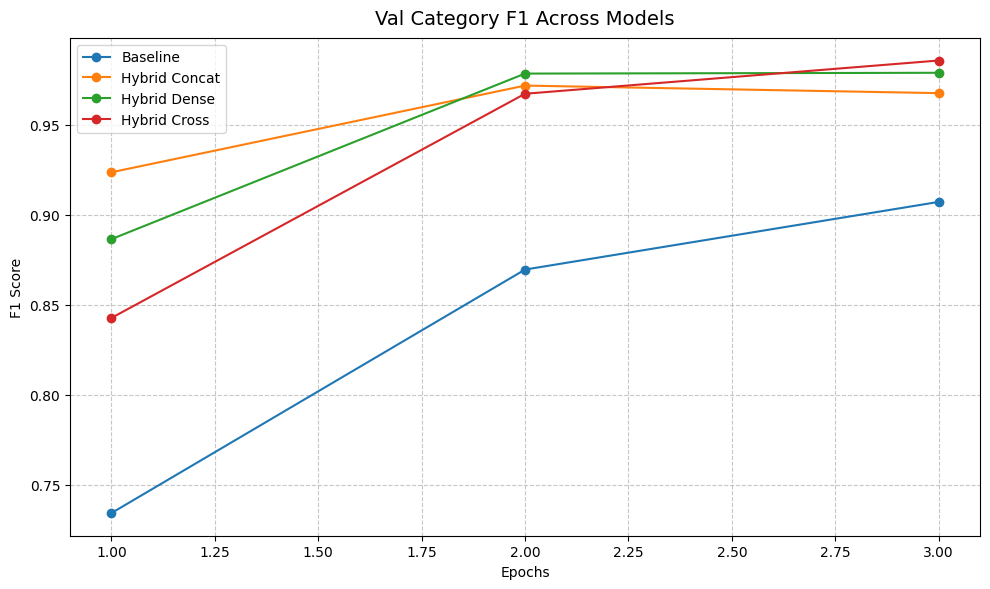

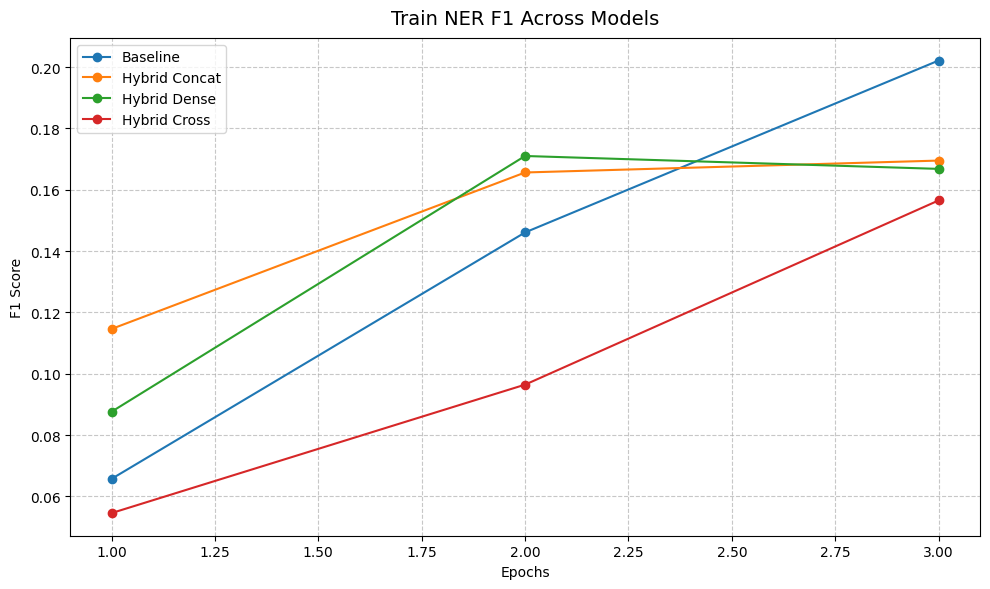

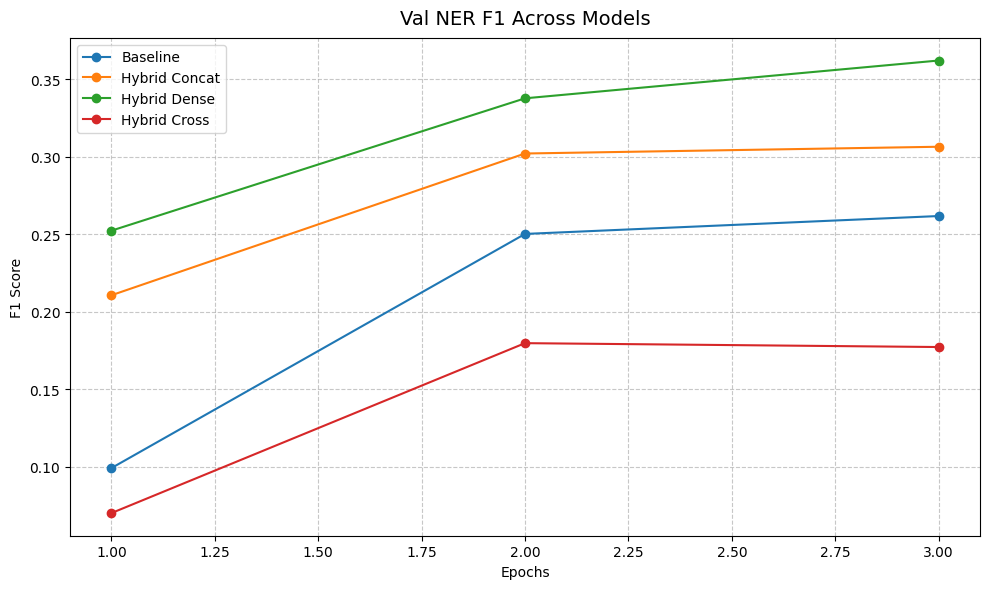

In [21]:
# Import necessary libraries
import matplotlib.pyplot as plt
import pandas as pd
import json
from IPython.display import display

# File paths
baseline = "../../models/Baseline/training_history.json"
hybrid_concat = "../../models/Hybrid_Concat/Hybrid_Concat_Freeze/training_history.json"
hybrid_dense = "../../models/Hybrid_Dense_Layer/Hybrid_Dense_Layer_Freeze/training_history.json"
hybrid_cross = "../../models/Hybrid_Cross_Attention/Hybrid_Cross_Attention_Freeze/training_history.json"

# Read from actual files
with open(baseline, 'r') as f:
    baseline_metrics = json.load(f)
with open(hybrid_concat, 'r') as f:
    hybrid_concat_metrics = json.load(f)
with open(hybrid_dense, 'r') as f:
    hybrid_dense_metrics = json.load(f)
with open(hybrid_cross, 'r') as f:
    hybrid_cross_metrics = json.load(f)

# Combine all results into a dictionary
all_metrics = {
    'Baseline': baseline_metrics,
    'Hybrid Concat': hybrid_concat_metrics,
    'Hybrid Dense': hybrid_dense_metrics,
    'Hybrid Cross': hybrid_cross_metrics
}

# Prepare data for table (using the last epoch values as a summary)
epochs = range(1, len(all_metrics['Baseline']['train_loss']) + 1)
models = list(all_metrics.keys())
table_data = []
for model, metrics in all_metrics.items():
    row = [model]
    row.extend([f"{metrics['train_loss'][-1]:.4f}", f"{metrics['val_loss'][-1]:.4f}",
                f"{metrics['train_intent_f1'][-1]:.4f}", f"{metrics['val_intent_f1'][-1]:.4f}",
                f"{metrics['train_category_f1'][-1]:.4f}", f"{metrics['val_category_f1'][-1]:.4f}",
                f"{metrics['train_ner_f1'][-1]:.4f}", f"{metrics['val_ner_f1'][-1]:.4f}"])
    table_data.append(row)
column_labels = ['Model', 'Train Loss', 'Val Loss', 'Train Intent F1', 'Val Intent F1',
                 'Train Category F1', 'Val Category F1', 'Train NER F1', 'Val NER F1']

# Create styled table
plt.figure(figsize=(12, 6))
ax = plt.gca()
ax.axis('off')
table = plt.table(cellText=table_data,
                  colLabels=column_labels,
                  cellLoc='center',
                  loc='center',
                  bbox=[0, 0, 1, 1])
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.5)
plt.title('Combined Training Metrics (Last Epoch)', pad=20)
plt.show()

# Prepare data for plotting
colors = {'Baseline': '#1f77b4', 'Hybrid Concat': '#ff7f0e', 'Hybrid Dense': '#2ca02c', 'Hybrid Cross': '#d62728'}
metrics = ['train_loss', 'val_loss', 'train_intent_f1', 'val_intent_f1',
           'train_category_f1', 'val_category_f1', 'train_ner_f1', 'val_ner_f1']
metric_labels = ['Train Loss', 'Val Loss', 'Train Intent F1', 'Val Intent F1',
                 'Train Category F1', 'Val Category F1', 'Train NER F1', 'Val NER F1']

# Create separate graphs for each metric
for i, (metric, label) in enumerate(zip(metrics, metric_labels)):
    plt.figure(figsize=(10, 6))
    for model in models:
        plt.plot(epochs, all_metrics[model][metric], marker='o', label=model, color=colors[model])
    plt.xlabel('Epochs')
    plt.ylabel(label if 'Loss' in label else 'F1 Score')
    plt.title(f'{label} Across Models', pad=10, fontsize=14)
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()